# Red wine quality prediction

Use RandomForest and XGBoost

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Load the data

In [5]:
data = pd.read_csv('./data/winequality-red.csv')

## Pre-process the data

1. Check missing data - none
2. Drop the irrelevant columns - unecessary in this case
3. Ensure data types are correct
3. Encode the categorical columns
4. Normalize the continuous columns
5. Put back the categorical and continuous columns together
6. Split the data into a training set and a validation set

In [6]:
# only continuous columns exist
X_all = data.drop('quality', axis = 1).values
X_all = (X_all - X_all.mean()) / X_all.std()
y_all = data['quality'].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 0)

## Random Forest Training

MSE = 0.44185110883657464


Text(0.6, 0.1, 'Pearson corr = 0.671721')

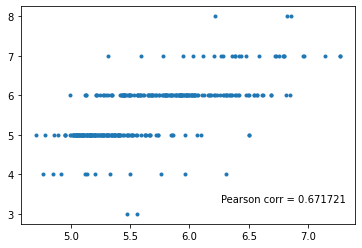

In [21]:
# n_estimators - number of trees in the forest
# max_depth    - maximum depth of the tree
# min_samples_split - minimum number of samples required to split an internal node
# min_samples_leaf - minimum number of samples required to be at a leaf node
reg = RandomForestRegressor(n_estimators = 200, random_state = 0, max_depth = None,
                            min_samples_split = 2, min_samples_leaf = 1, oob_score = True)
reg.fit(X_train, y_train)
print("MSE = {}".format(reg.score(X_test, y_test)))
y_val = reg.predict(X_test)

fig, ax = plt.subplots()
ax.plot(y_val, y_test, '.')
corr = np.corrcoef(y_val.reshape(-1), y_test)[0,1]
ax.text(0.6,0.1,f'Pearson corr = {corr:.6f}',transform = ax.transAxes)

In [15]:
print(reg.estimators_[:10])

[DecisionTreeRegressor(max_features='auto', random_state=209652396), DecisionTreeRegressor(max_features='auto', random_state=398764591), DecisionTreeRegressor(max_features='auto', random_state=924231285), DecisionTreeRegressor(max_features='auto', random_state=1478610112), DecisionTreeRegressor(max_features='auto', random_state=441365315), DecisionTreeRegressor(max_features='auto', random_state=1537364731), DecisionTreeRegressor(max_features='auto', random_state=192771779), DecisionTreeRegressor(max_features='auto', random_state=1491434855), DecisionTreeRegressor(max_features='auto', random_state=1819583497), DecisionTreeRegressor(max_features='auto', random_state=530702035)]


In [16]:
print(reg.oob_score_)

0.5022959612068372


## XGBoost training

MSE = 0.4199467821093804


Text(0.6, 0.1, 'Pearson corr = 0.665200')

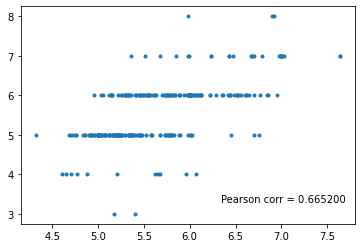

In [22]:
# n_estimators - number of trees in the forest
# max_depth - maximum depth of each regression tree
# eta - learning rate
# gamma - minimum loss reduction required to make a further partition on a leaf node of the tree
# subsample - fraction of samples to be used for fitting each tree
# colsample_bytree - fraction of features to be used for each tree
reg = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, gamma = 0, 
                   subsample=0.6, colsample_bytree=0.5, random_state = 333)
reg.fit(X_train, y_train)
print("MSE = {}".format(reg.score(X_test, y_test)))
y_val = reg.predict(X_test)

fig, ax = plt.subplots()
ax.plot(y_val, y_test, '.')
corr = np.corrcoef(y_val.reshape(-1), y_test)[0,1]
ax.text(0.6,0.1,f'Pearson corr = {corr:.6f}',transform = ax.transAxes)